In [2]:
import os
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from IPython.display import Audio
from sklearn.decomposition import PCA

from helpers import *

In [3]:
# find pcs that represent song sparrow frequency profile
data_dir = "clear_bird_calls_raw"
wavs = sorted(list_wav(data_dir))

# base_dir = f"/Volumes/My Passport/Song sparrow songs analysis/Song analysis - Jiayi/Named/"
# YEAR=2015
# save_dir = f"Segments_{YEAR}" # where segments will be saved
# wavs = list_wav(os.path.join(base_dir, save_dir))

In [4]:
from scipy import signal
n_bin = 61
M = 5
window = signal.windows.exponential(M=M, tau=1)

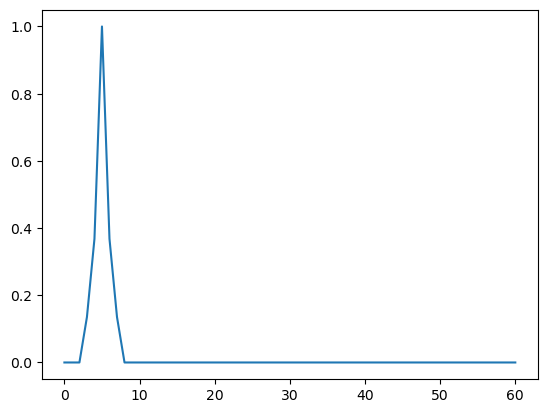

In [5]:
plt.plot(generate_exp_win(c=5, nbins=n_bin))

In [6]:
seed = 42
rng = np.random.default_rng(seed=seed)

In [7]:
print(wavs_list[25])

NameError: name 'wavs_list' is not defined

Text(0.5, 0, 'Freq bins')

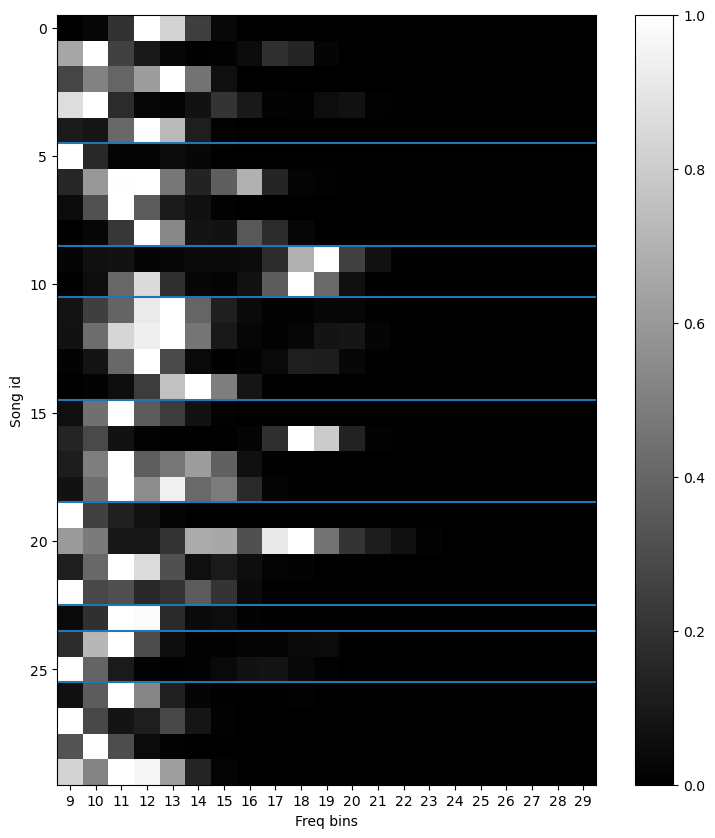

In [13]:
rep = 30
wavs_list = sorted(rng.choice(wavs, rep, replace=False))

centers = range(9, 30)
V = np.zeros((rep, len(centers)))
C = np.zeros((rep, len(centers), len(centers)))

freq_arts = []
for center in centers:
    freq_art = np.zeros(n_bin)
    freq_art[center-M//2:center+M//2+1] = window
    freq_arts.append(freq_art)
    
ind_idx = []
curr_ind = None
for w, wav in enumerate(wavs_list):
    # plt.figure()
    ind, _, _, _ = parse_filename(wav)
    if (curr_ind is None):
        curr_ind = ind
    elif (curr_ind != ind):
        ind_idx.append(w-1)
        curr_ind = ind

    sr, seg = wavfile.read(os.path.join(data_dir, wav))
    f, t, sxx = spectrogram(seg, fs=sr, window=("hann"), nperseg=120)
    acts = []

    for i in range(len(centers)):
        act = freq_arts[i] @ sxx
        acts.append(act)
        # plt.plot(act, alpha=0.8, label=f"{centers[i]}")
        V[w, i] = np.var(act)

    c = np.corrcoef(np.array(acts))
    C[w,:] = c

    # plt.figure()
    # plt.imshow(c)
    # plt.xticks(range(len(centers)), centers)
    # plt.colorbar()

plt.figure(figsize=(10, 10))
# normalize V by each song
min_v, max_v = np.min(V, axis=1), np.max(V, axis=1)
for w in range(rep):
    V[w, :] -= min_v[w]
    V[w, :] = V[w, :]/(max_v[w]-min_v[w])

plt.imshow(V, cmap="gray")
# plt.imshow(np.reshape(np.sum(V, axis=0), (1, -1)), cmap="gray")
plt.xticks(range(len(centers)), centers)
plt.colorbar()

for i in ind_idx:
    plt.axhline(y=i+0.5)

plt.ylabel("Song id")
plt.xlabel("Freq bins")

# for i, center in enumerate(centers):
#     v = V[:, i]
#     print(v)
#     plt.plot(np.ones_like(v)*center, v)


([<matplotlib.axis.YTick at 0x167651ba0>,
 [Text(0, 0, '9'),
  Text(0, 1, '10'),
  Text(0, 2, '11'),
  Text(0, 3, '12'),
  Text(0, 4, '13'),
  Text(0, 5, '14'),
  Text(0, 6, '15'),
  Text(0, 7, '16'),
  Text(0, 8, '17'),
  Text(0, 9, '18'),
  Text(0, 10, '19'),
  Text(0, 11, '20'),
  Text(0, 12, '21'),
  Text(0, 13, '22'),
  Text(0, 14, '23'),
  Text(0, 15, '24'),
  Text(0, 16, '25'),
  Text(0, 17, '26'),
  Text(0, 18, '27'),
  Text(0, 19, '28'),
  Text(0, 20, '29')])

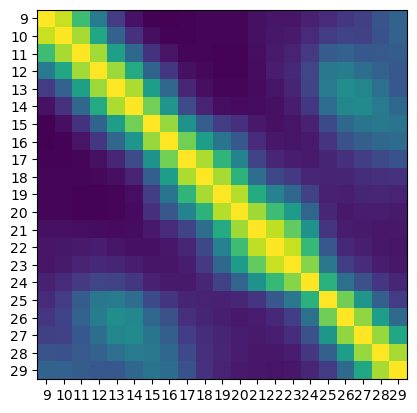

In [16]:
plt.imshow(np.mean(C, axis=0))
plt.xticks(range(len(centers)), centers)
plt.yticks(range(len(centers)), centers)


([<matplotlib.axis.XTick at 0x16da36560>,
 [Text(0, 0, '9'),
  Text(1, 0, '10'),
  Text(2, 0, '11'),
  Text(3, 0, '12'),
  Text(4, 0, '13'),
  Text(5, 0, '14'),
  Text(6, 0, '15'),
  Text(7, 0, '16'),
  Text(8, 0, '17'),
  Text(9, 0, '18'),
  Text(10, 0, '19'),
  Text(11, 0, '20'),
  Text(12, 0, '21'),
  Text(13, 0, '22'),
  Text(14, 0, '23'),
  Text(15, 0, '24'),
  Text(16, 0, '25'),
  Text(17, 0, '26'),
  Text(18, 0, '27'),
  Text(19, 0, '28'),
  Text(20, 0, '29')])

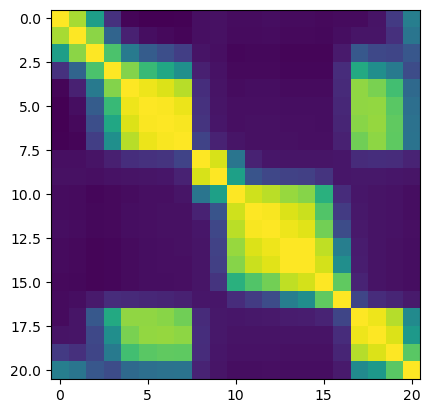

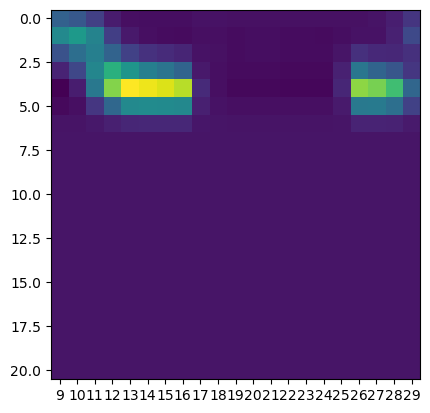

In [154]:
r = 0
c_new = np.zeros_like(C[r,:])
c_new[:,:] = C[r,:]

plt.imshow(c_new)

for i in range(len(centers)):
    c_new[i,:] *= V[r, i]

plt.imshow(C[r,:])
plt.figure()
plt.imshow(c_new)
plt.xticks(range(len(centers)), centers)

bbom_20150324_0847_005_PN_401b.wav
bbom_20150324_0847_005_PN_401c.wav
bbom_20150330_1102_031_PN_404g.wav
bbom_20150330_1113_020_PN_406a.wav
bbom_20150330_1131_076_PN_403f.wav
bbom_20150330_1144_013_PN_402p.wav
bbom_20150330_1157_033_PN_404r.wav
bbom_20150401_0848_015_PN_400d.wav
bdmo_20150404_1020_002_MA_413a.wav
bdmo_20150416_0834_001_MA_407k.wav


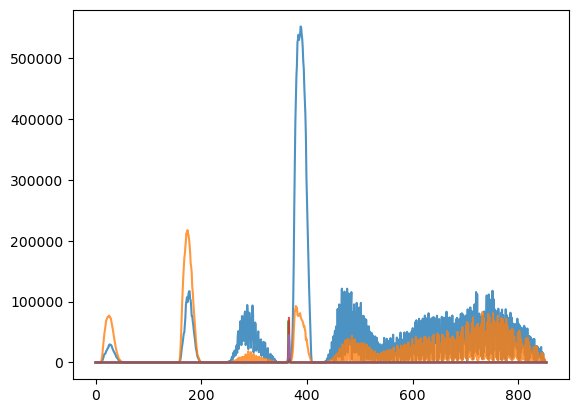

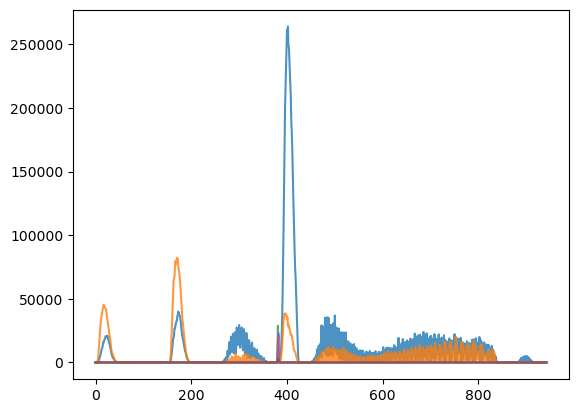

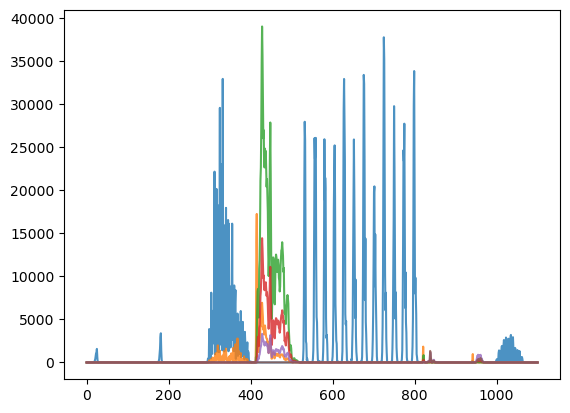

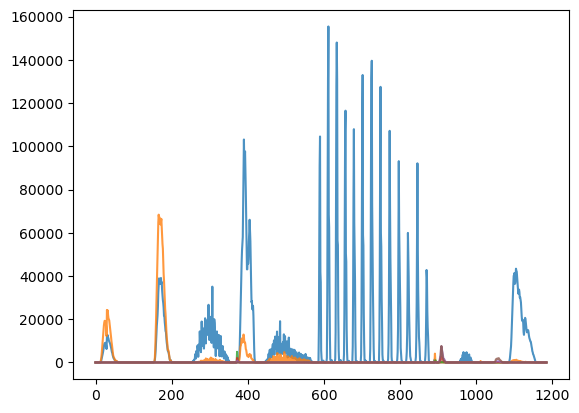

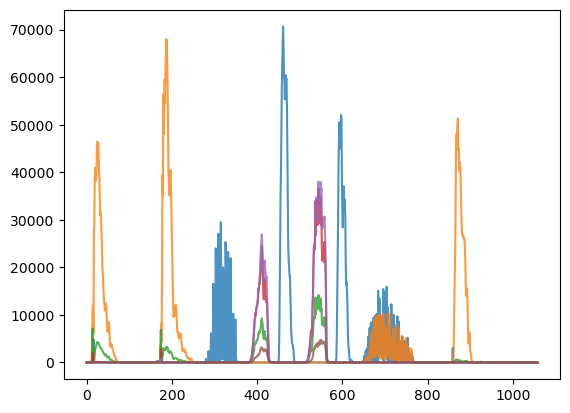

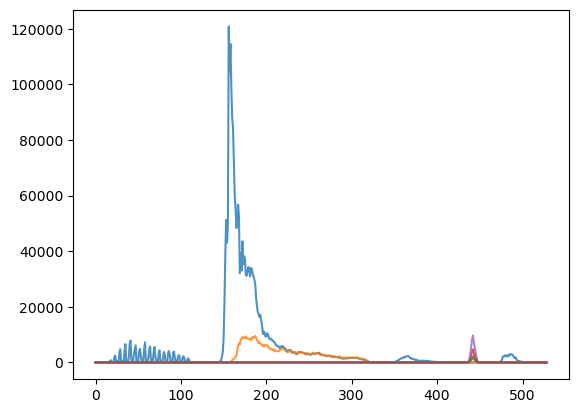

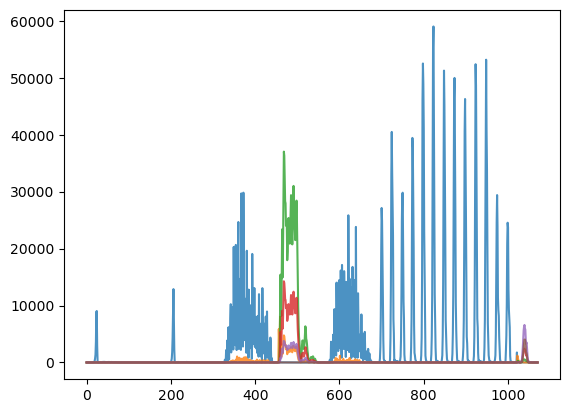

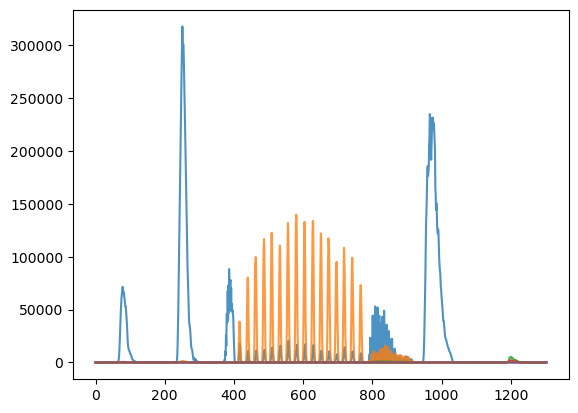

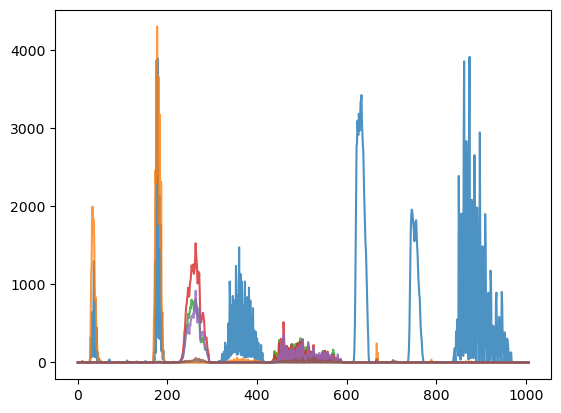

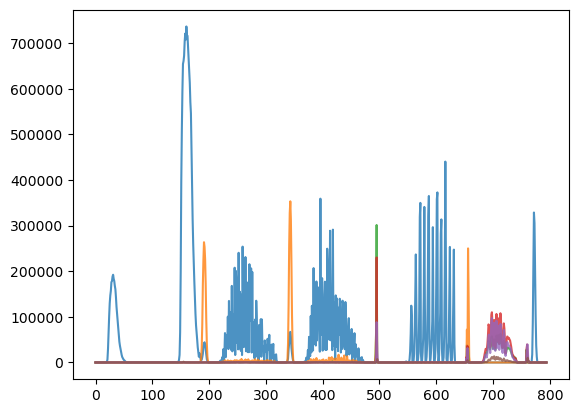

In [17]:
rep = 10
wavs_list = sorted(wavs)[:rep]

centers = [11, 15, 18, 19, 20, 22]
# V = np.zeros((rep, len(centers)))
# C = np.zeros((rep, len(centers), len(centers)))

freq_arts = []
for center in centers:
    freq_art = np.zeros(n_bin)
    freq_art[center-M//2:center+M//2+1] = window
    freq_arts.append(freq_art)
    
# ind_idx = []
# curr_ind = None
for w, wav in enumerate(wavs_list):
    plt.figure()
    print(wav)
    # ind, _, _, _ = parse_filename(wav)
    # if (curr_ind is None):
    #     curr_ind = ind
    # elif (curr_ind != ind):
    #     ind_idx.append(w-1)
    #     curr_ind = ind

    sr, seg = wavfile.read(os.path.join(data_dir, wav))
    f, t, sxx = spectrogram(seg, fs=sr, window=("hann"), nperseg=120)
    acts = []

    for i in range(len(centers)):
        act = freq_arts[i] @ sxx
        # acts.append(act)
        plt.plot(act, alpha=0.8, label=f"{centers[i]}")
        # V[w, i] = np.var(act)

    # c = np.corrcoef(np.array(acts))
    # C[w,:] = c

    # plt.figure()
    # plt.imshow(c)
    # plt.xticks(range(len(centers)), centers)
    # plt.colorbar()

# plt.figure(figsize=(10, 25))
# # normalize V by each song
# min_v, max_v = np.min(V, axis=1), np.max(V, axis=1)
# for w in range(rep):
#     V[w, :] -= min_v[w]
#     V[w, :] = V[w, :]/(max_v[w]-min_v[w])

# plt.imshow(V, cmap="gray")
# # plt.imshow(np.reshape(np.sum(V, axis=0), (1, -1)), cmap="gray")
# plt.xticks(range(len(centers)), centers)
# plt.colorbar()

# for i in ind_idx:
#     plt.axhline(y=i+0.5)

# # for i, center in enumerate(centers):
# #     v = V[:, i]
# #     print(v)
# #     plt.plot(np.ones_like(v)*center, v)


bbom_20150324_0847_005_PN_401b.wav
12
13
bbom_20150324_0847_005_PN_401c.wav
12
13
bbom_20150330_1102_031_PN_404g.wav
10
17
9
12
bbom_20150330_1113_020_PN_406a.wav
13
10
12
bbom_20150330_1131_076_PN_403f.wav
10
15


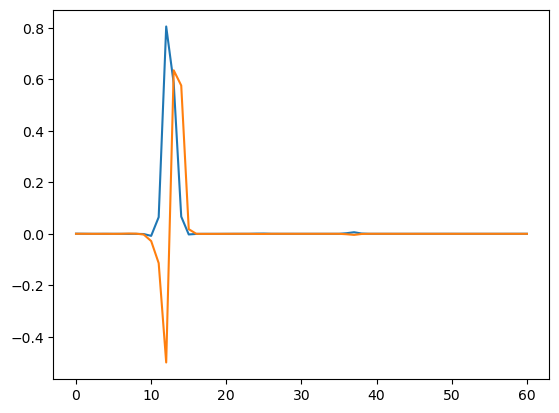

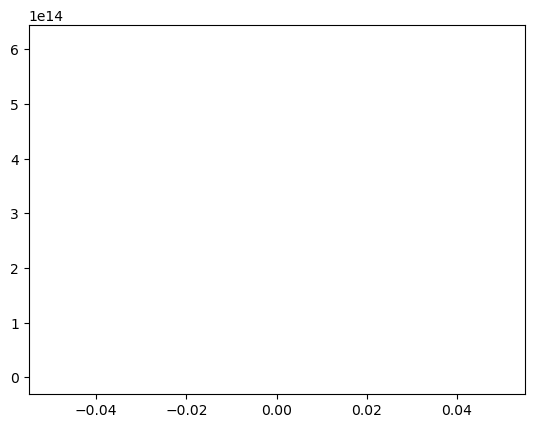

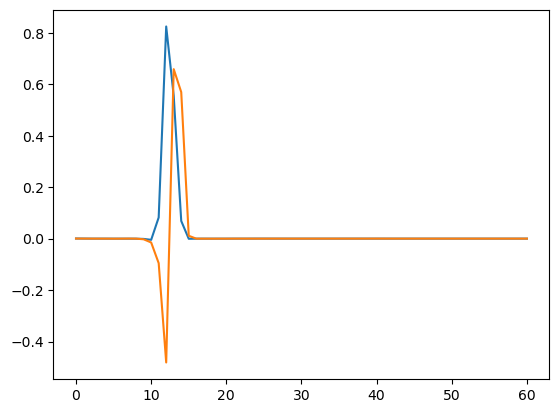

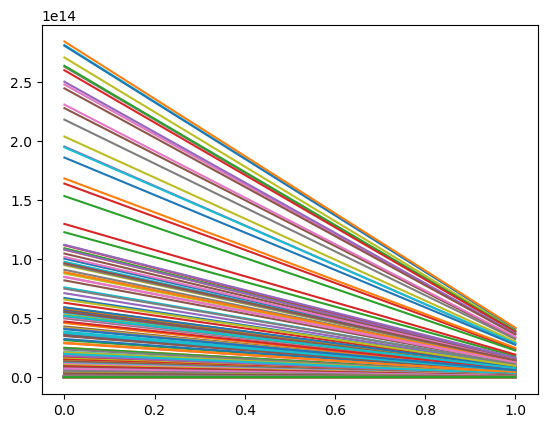

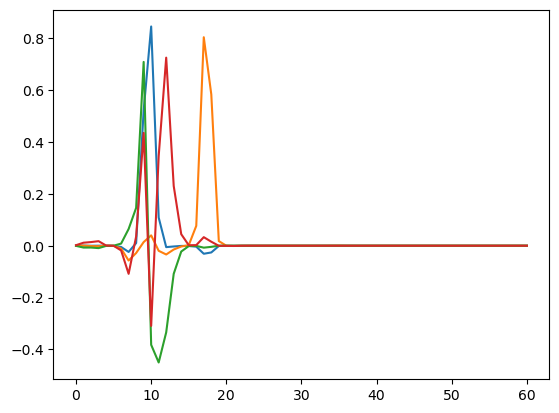

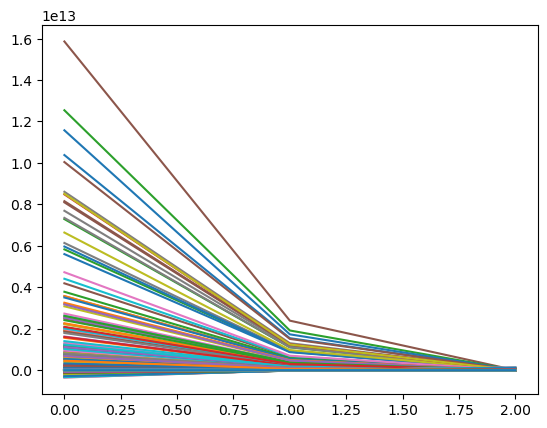

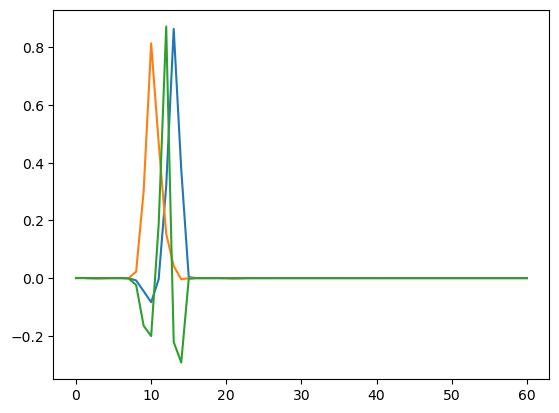

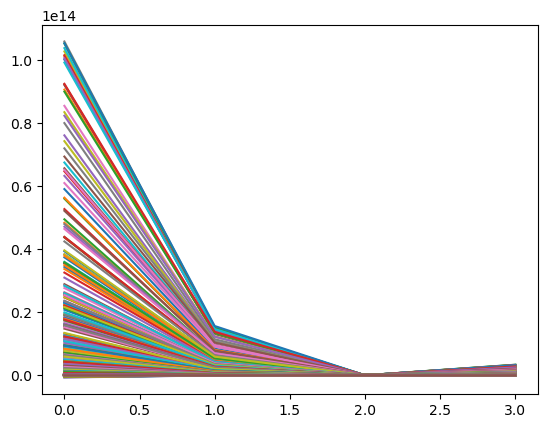

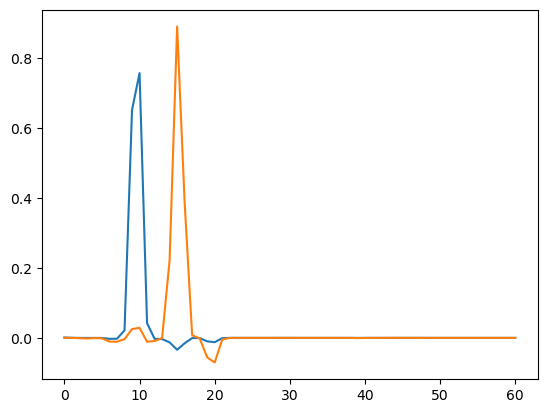

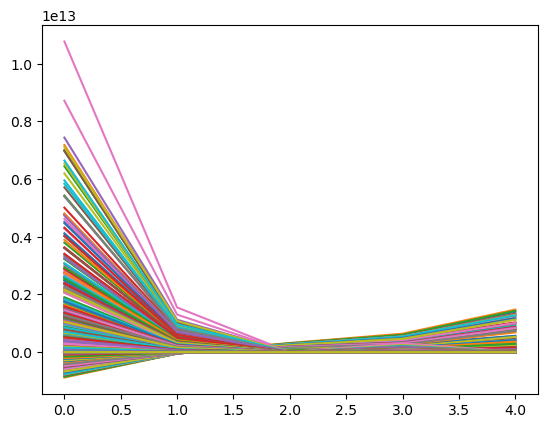

In [61]:
freq_comps = []

for wav in wavs[:5]:
    print(wav)
    sr, seg = wavfile.read(os.path.join(data_dir, wav))
    f, t, sxx = spectrogram(seg, fs=sr, window=("hann"), nperseg=120)

    pca = PCA()
    pca.fit(sxx.T)

    # get the variance explained ratio (as a measure of importance)
    var_r = pca.explained_variance_ratio_
    cumsum_var_r = np.cumsum(var_r) 
    n_90 = np.where(cumsum_var_r > 0.9)[0][0]+1

    # norm_w = var_r[:n_90] / (np.sum(var_r[:n_90]) * np.var(sxx))
    norm_w = var_r[:n_90] * np.var(sxx)
    # norm_w = np.ones(n_90)
    freq_comp = norm_w @ pca.components_[:n_90]
    freq_comps.append(freq_comp)
    plt.figure()
    for i in range(n_90):
        plt.plot(pca.components_[i])
        print(np.argmax(pca.components_[i]))
    
    # freq_comps = np.mean(freq_comps, axis=0)
    # plt.plot(freq_comps, "o")


# for wav in wavs[:3]:
#     sr, seg = wavfile.read(os.path.join(data_dir, wav))
#     f, t, sxx = spectrogram(seg, fs=sr, window=("hann"), nperseg=120)

    # plt.figure()
    # for i in range(n_90):
    #     plt.plot(pca.components_[i])

    # freq_comp = freq_comps[0]
    # freq_comps.append(freq_comp)
    # plt.plot(freq_comp)

    plt.figure()
    plt.plot(freq_comps @ sxx)
    


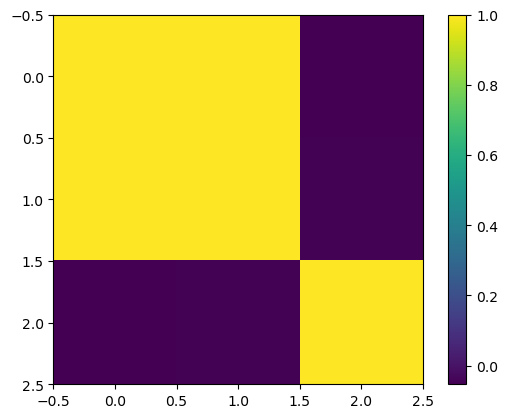

In [17]:
c = np.corrcoef(np.array(freq_comps))
plt.imshow(c)
plt.colorbar()

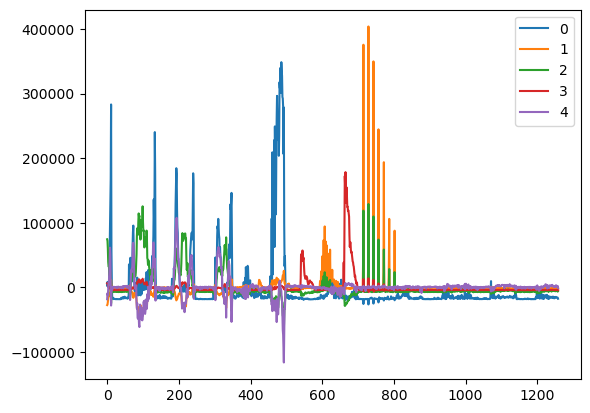

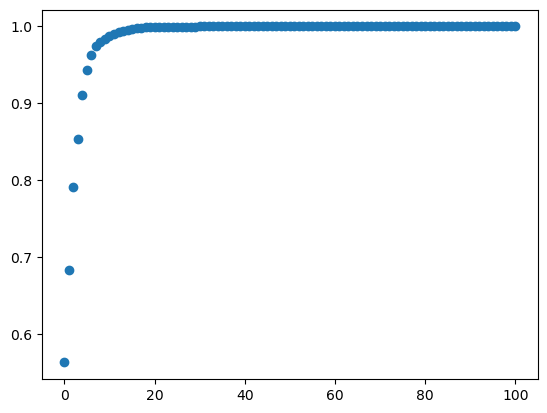

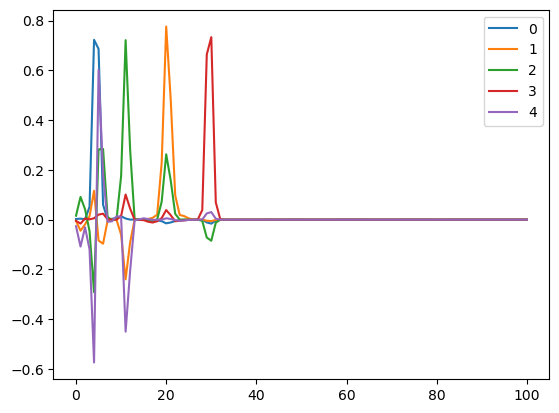

In [45]:
sr, seg_ex = wavfile.read("segments/2015/"+list_wav("segments/2015")[0])
Audio(seg_ex, rate=sr)

f, t, sxx_ex = spectrogram(seg_ex, fs=sr, window=("hann"), nperseg=200)

pca = PCA()
fitted_sxx_ex = pca.fit_transform(sxx_ex.T)

for i in range(5):
    plt.plot(fitted_sxx_ex[:,i], label=f"{i}")

plt.legend()

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), "o")

plt.figure()
for i in range(5):
    plt.plot(pca.components_[i], label=f"{i}")
# plt.xticks(f)

plt.legend()


In [44]:
freq_comp = pca.components_[1] + pca.components_[3]

In [37]:
idx = 1
sr, seg = wavfile.read(os.path.join(data_dir, wavs[idx]))
print(wavs[idx])

mpop_20150324_1123_009_MA_445a.wav


In [25]:
Audio(seg, rate=sr)

In [26]:
f, t, sxx = spectrogram(seg, fs=sr, window=("hann"), nperseg=200)

pca = PCA()
fitted_sxx = pca.fit_transform(sxx.T)


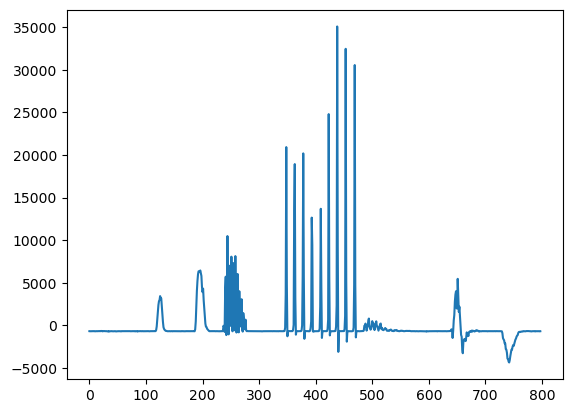

In [39]:
plt.plot(np.sum(fitted_sxx[:,1:2], axis=1))
# plt.plot(fitted_sxx[:,1])

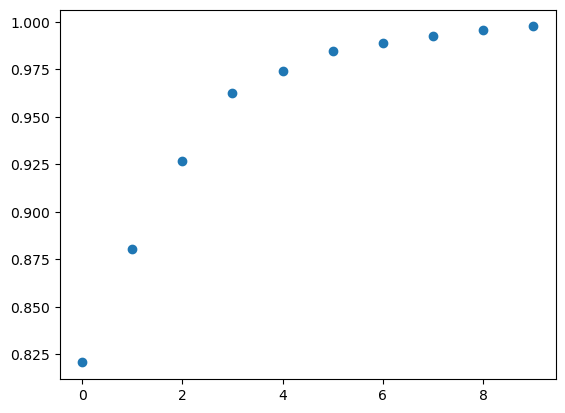

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)[:10], "o")

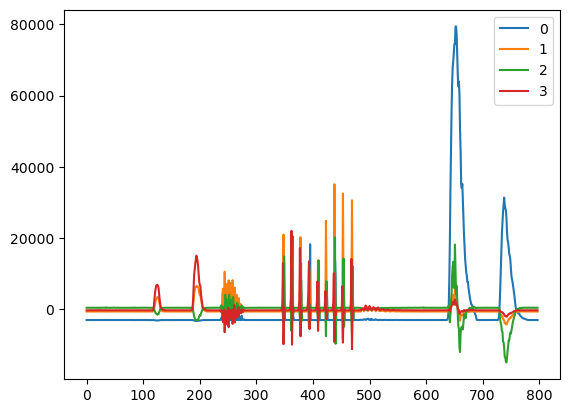

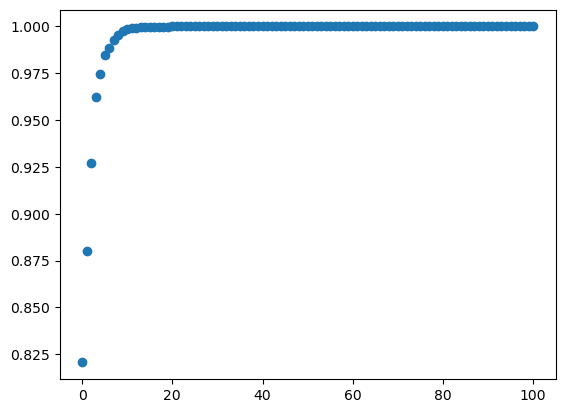

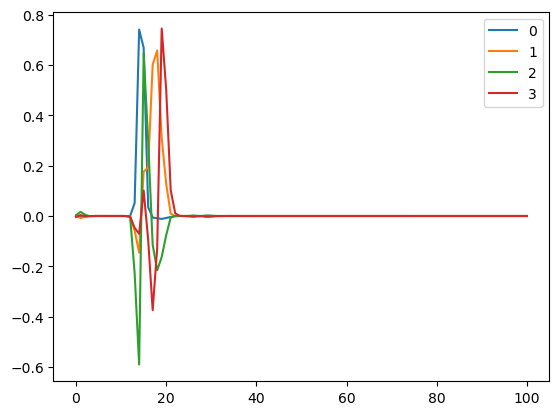

In [28]:


for i in range(4):
    plt.plot(fitted_sxx[:,i], label=f"{i}")

plt.legend()

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), "o")

plt.figure()
for i in range(4):
    plt.plot(pca.components_[i], label=f"{i}")
# plt.xticks(f)

plt.legend()
